# Analyse des catégories les plus populaires et leur évolution

## Quelles sont les catégories de produits les plus vendues et comment évolue leur popularité ?

In [1]:
import pandas as pd, os, matplotlib.pyplot as plt, seaborn as sns

os.chdir(r"../donnees")

In [2]:
# Chargement des données
analyse_achats = pd.read_parquet("analyse_achat.parquet")

analyse_achats['purchase_timestamp'] = pd.to_datetime(analyse_achats['purchase_timestamp'])

analyse_achats = analyse_achats[
    (analyse_achats["purchase_timestamp"] >= "2017-01-01") & 
    (analyse_achats["purchase_timestamp"] <= "2018-08-31")
]

analyse_achats['annee'] = analyse_achats['purchase_timestamp'].dt.year
analyse_achats['mois'] = analyse_achats['purchase_timestamp'].dt.month
analyse_achats['annee_mois'] = analyse_achats['purchase_timestamp'].dt.to_period('M')

category_monthly = analyse_achats.groupby(['category_name', 'annee_mois']).size().reset_index(name='counts')
top_categories = category_monthly.groupby('category_name')['counts'].sum().nlargest(10).index
top_category_monthly = category_monthly[category_monthly['category_name'].isin(top_categories)]
category_product_details = analyse_achats[analyse_achats['category_name'].isin(top_categories)]
product_sales = category_product_details.groupby(['product_id', 'category_name'])['order_item_id'].count().reset_index(name='counts')

analyse_achats.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'shipping_limit', 'limit', 'name_lenght',
       'description_lenght', 'photos_qty', 'weight_g', 'length_cm',
       'height_cm', 'width_cm', 'category_name', 'customer_id',
       'purchase_timestamp', 'approved_at', 'delivered_carrier',
       'delivered_customer', 'estimated_delivery', 'status', 'annee', 'mois',
       'annee_mois', 'jour', 'annee_jour', 'jour_semaine', 'trimestre',
       'annee_trimestre', 'semaine', 'annee_semaine', 'heure', 'approuvee',
       'envoyee', 'livree', 'estimee', 'customer_unique_id', 'cust_zip_code',
       'cust_city', 'cust_state', 'cust_name_state', 'cust_lat', 'cust_lng',
       'sell_zip_code', 'sell_city', 'sell_state', 'sell_name_state',
       'sell_lat', 'sell_lng'],
      dtype='object')

### Evolution des ventes des catégories les plus populaires

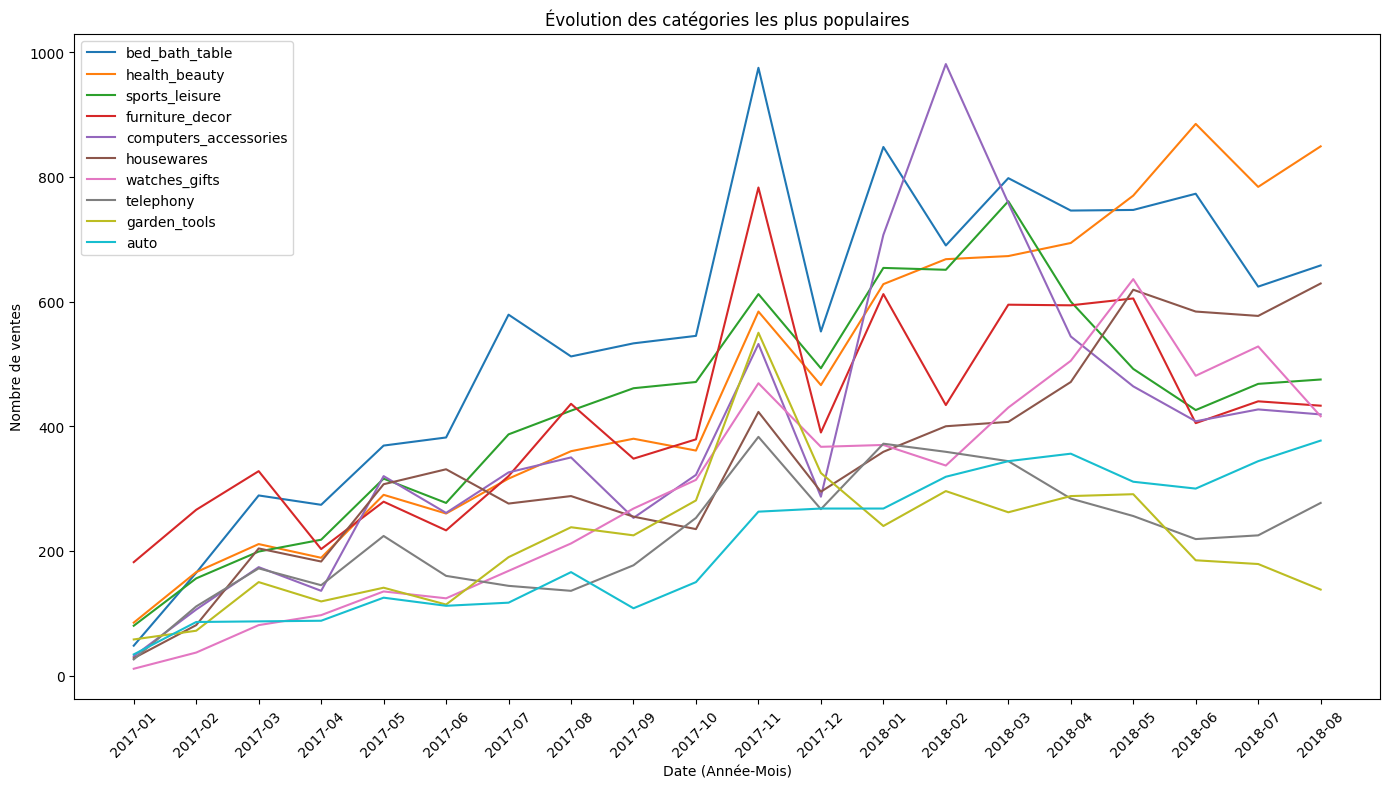

In [3]:
plt.figure(figsize=(14, 8))
for category in top_categories:
    category_data = top_category_monthly[top_category_monthly['category_name'] == category]
    plt.plot(category_data['annee_mois'].astype(str), category_data['counts'], label=category)
plt.xlabel('Date (Année-Mois)')
plt.ylabel('Nombre de ventes')
plt.title('Évolution des catégories les plus populaires')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Boxplot des ventes par catégorie

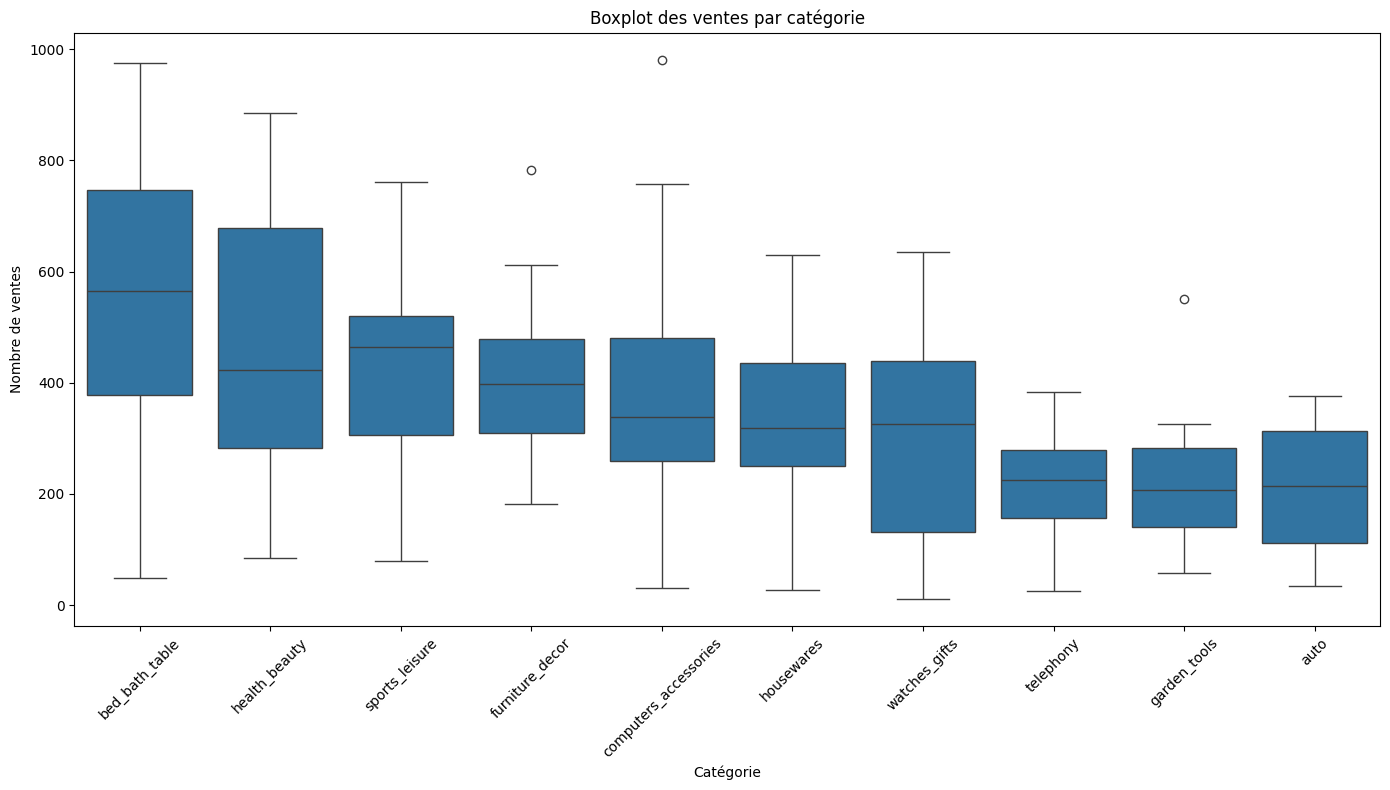

In [4]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='category_name', y='counts', data=top_category_monthly, order=top_categories)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de ventes')
plt.title('Boxplot des ventes par catégorie')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Histogramme des ventes par catégorie

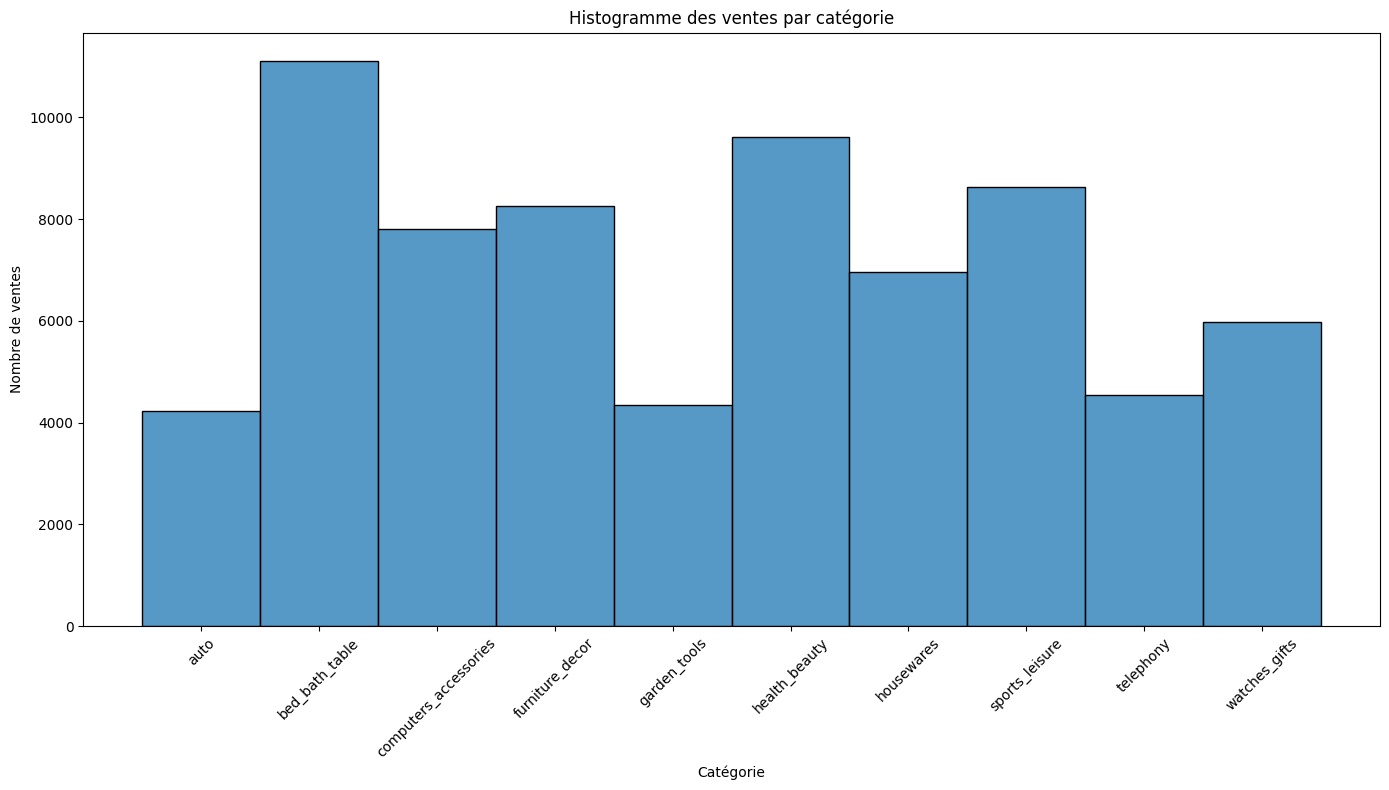

In [5]:
plt.figure(figsize=(14, 8))
sns.histplot(data=top_category_monthly, x='category_name', weights='counts', bins=10, kde=False)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de ventes')
plt.title('Histogramme des ventes par catégorie')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Répartition des ventes par catégorie (Top 10)

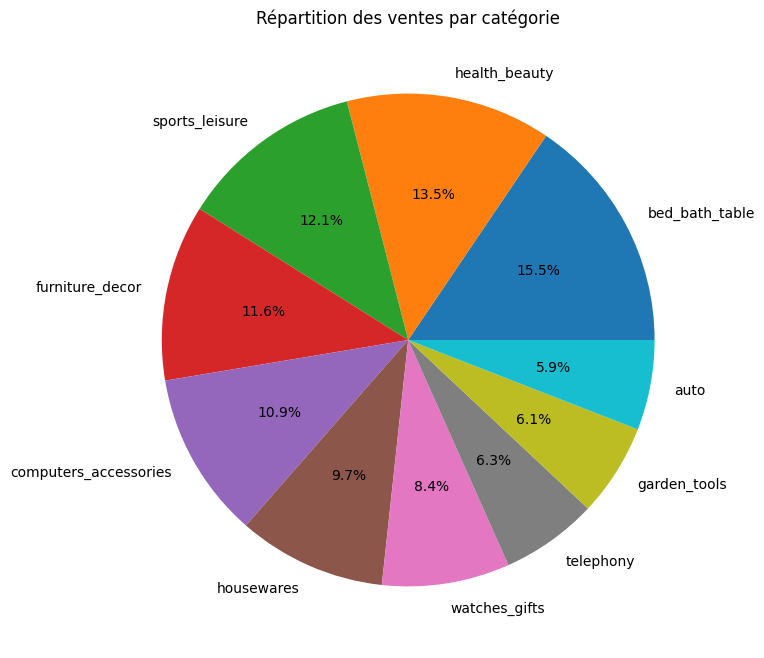

In [6]:
top_10_categories = analyse_achats["category_name"].value_counts().head(10)
plt.figure(figsize=(14, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct="%1.1f%%", colors=sns.color_palette("tab10"))
plt.title("Répartition des ventes par catégorie")
plt.show()

### Evolution des ventes cumulées par catégorie

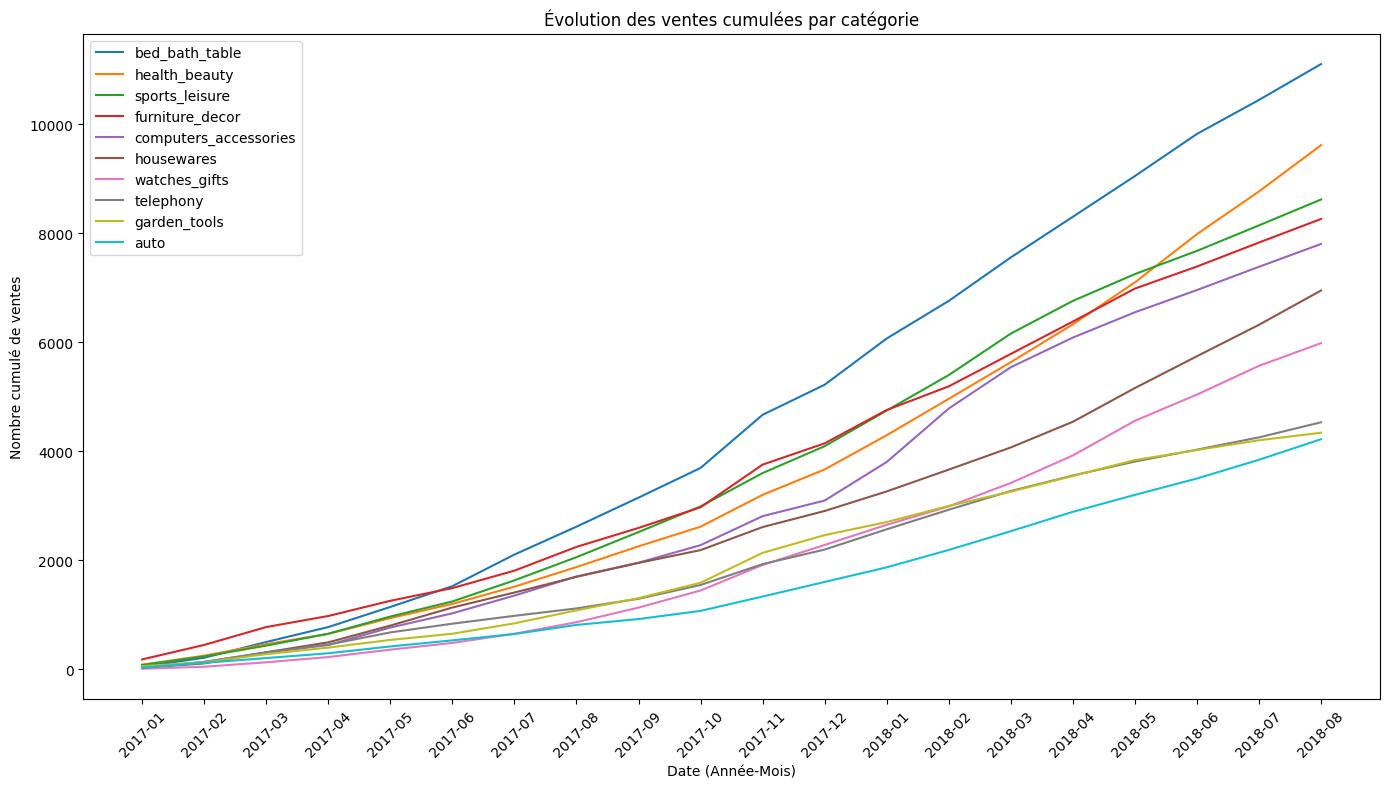

In [7]:
category_cumsum = top_category_monthly.groupby(['category_name', 'annee_mois']).sum().groupby(level=0).cumsum().reset_index()
plt.figure(figsize=(14, 8))
for category in top_categories:
    category_data = category_cumsum[category_cumsum['category_name'] == category]
    plt.plot(category_data['annee_mois'].astype(str), category_data['counts'], label=category)
plt.xlabel('Date (Année-Mois)')
plt.ylabel('Nombre cumulé de ventes')
plt.title('Évolution des ventes cumulées par catégorie')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Boxplot des ventes par mois pour les catégories les plus populaires

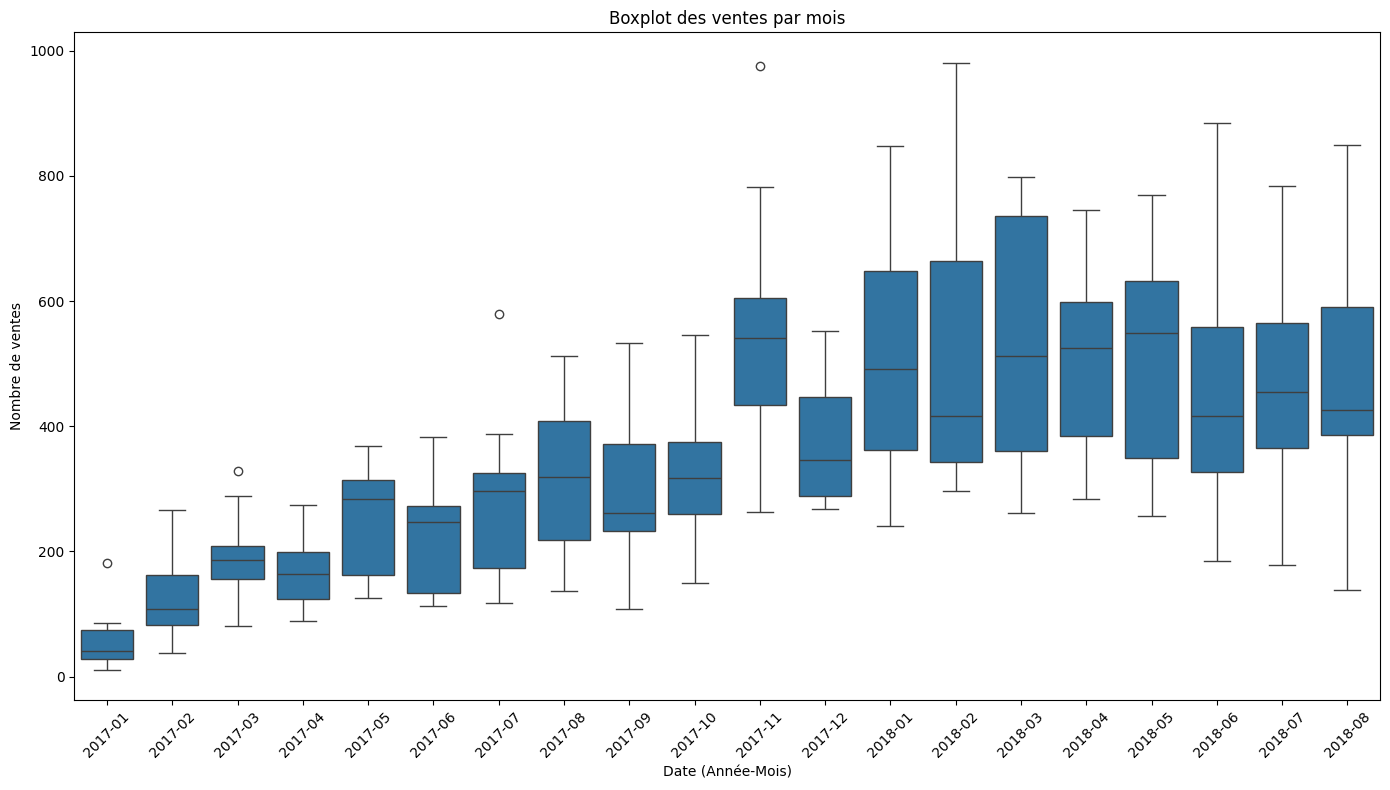

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='annee_mois', y='counts', data=top_category_monthly)
plt.xlabel('Date (Année-Mois)')
plt.ylabel('Nombre de ventes')
plt.title('Boxplot des ventes par mois')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Popularité des catégories de produits par État

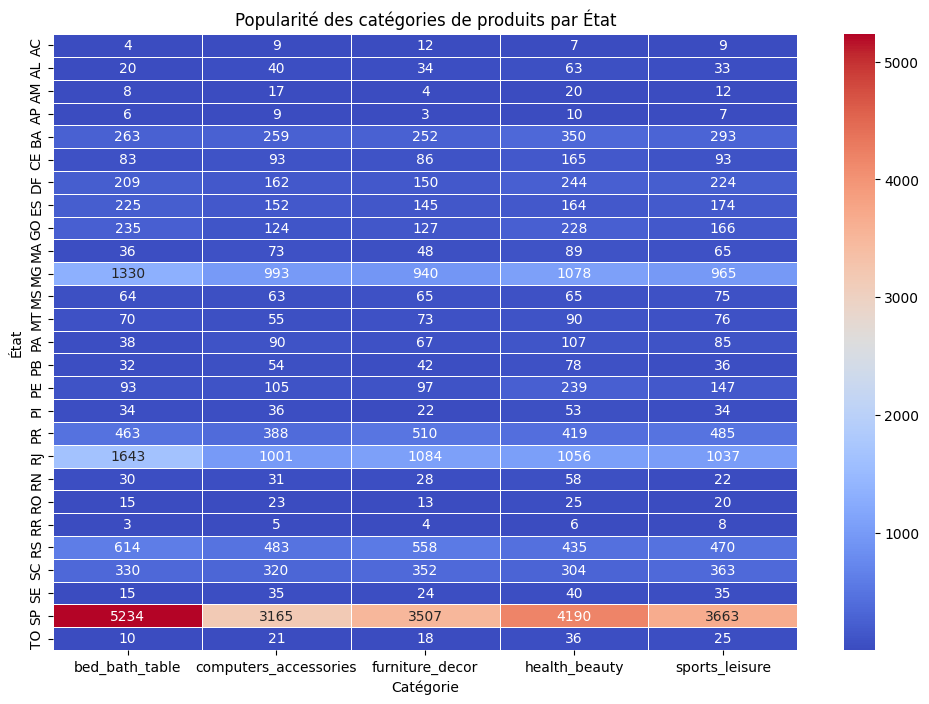

In [9]:
top_5_categories = analyse_achats["category_name"].value_counts().head(5).index

categorie_par_etat = (
    analyse_achats[analyse_achats["category_name"].isin(top_5_categories)]
    .groupby(["cust_state", "category_name"])
    .size()
    .unstack()
)

plt.figure(figsize=(12, 8))
sns.heatmap(categorie_par_etat, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Catégorie")
plt.ylabel("État")
plt.title("Popularité des catégories de produits par État")
plt.show()

### Influence du prix moyen sur la popularité des catégories

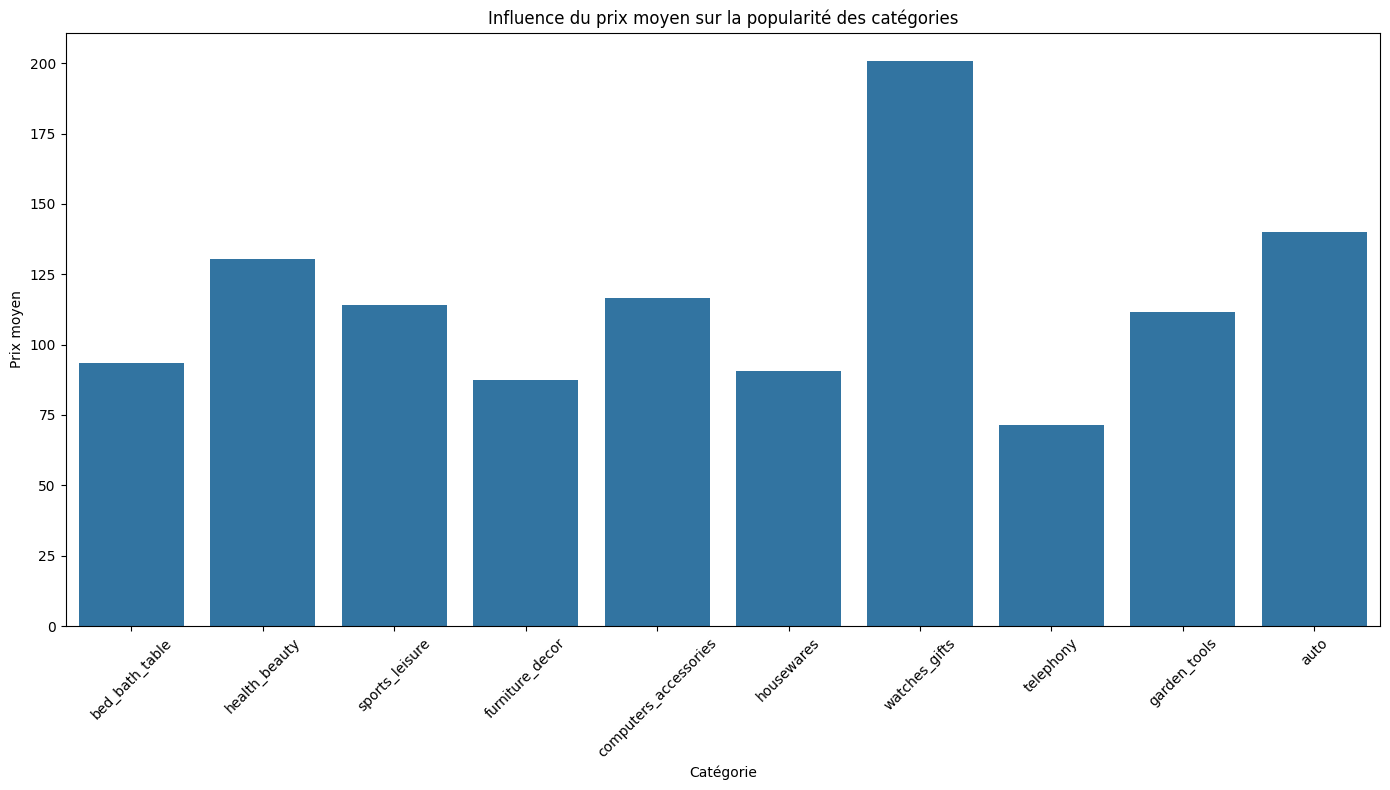

In [10]:
plt.figure(figsize=(14, 8))
avg_price_category = category_product_details.groupby('category_name')['price'].mean().loc[top_categories]
sns.barplot(x=avg_price_category.index, y=avg_price_category.values)
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen')
plt.title('Influence du prix moyen sur la popularité des catégories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Influence du poids moyen sur la popularité des catégories

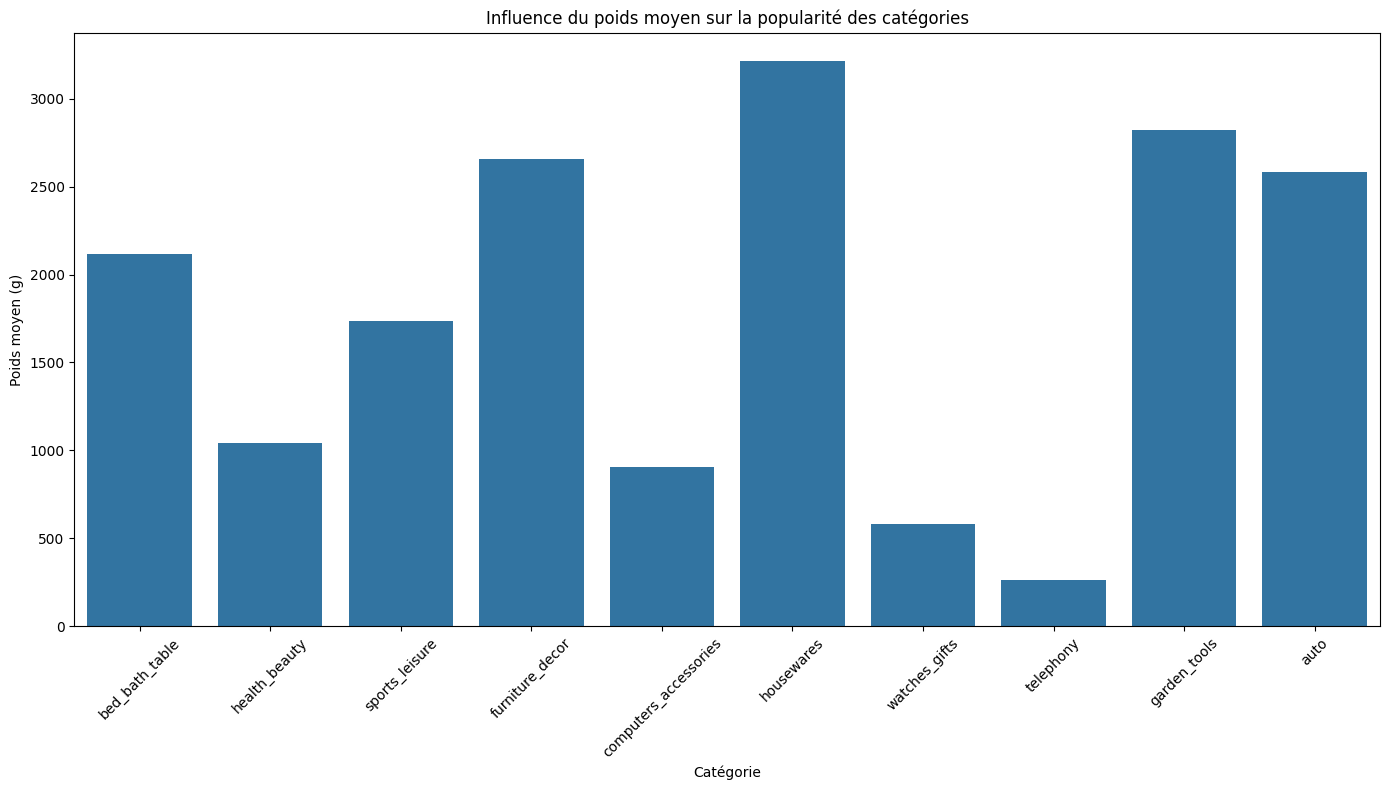

In [11]:
plt.figure(figsize=(14, 8))
avg_weight_category = category_product_details.groupby('category_name')['weight_g'].mean().loc[top_categories]
sns.barplot(x=avg_weight_category.index, y=avg_weight_category.values)
plt.xlabel('Catégorie')
plt.ylabel('Poids moyen (g)')
plt.title('Influence du poids moyen sur la popularité des catégories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Influence du volume moyen sur la popularité des catégories

C:\Users\lucas\AppData\Local\Temp\ipykernel_10808\949662825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_product_details['volume_cm3'] = category_product_details['length_cm'] * category_product_details['height_cm'] * category_product_details['width_cm']


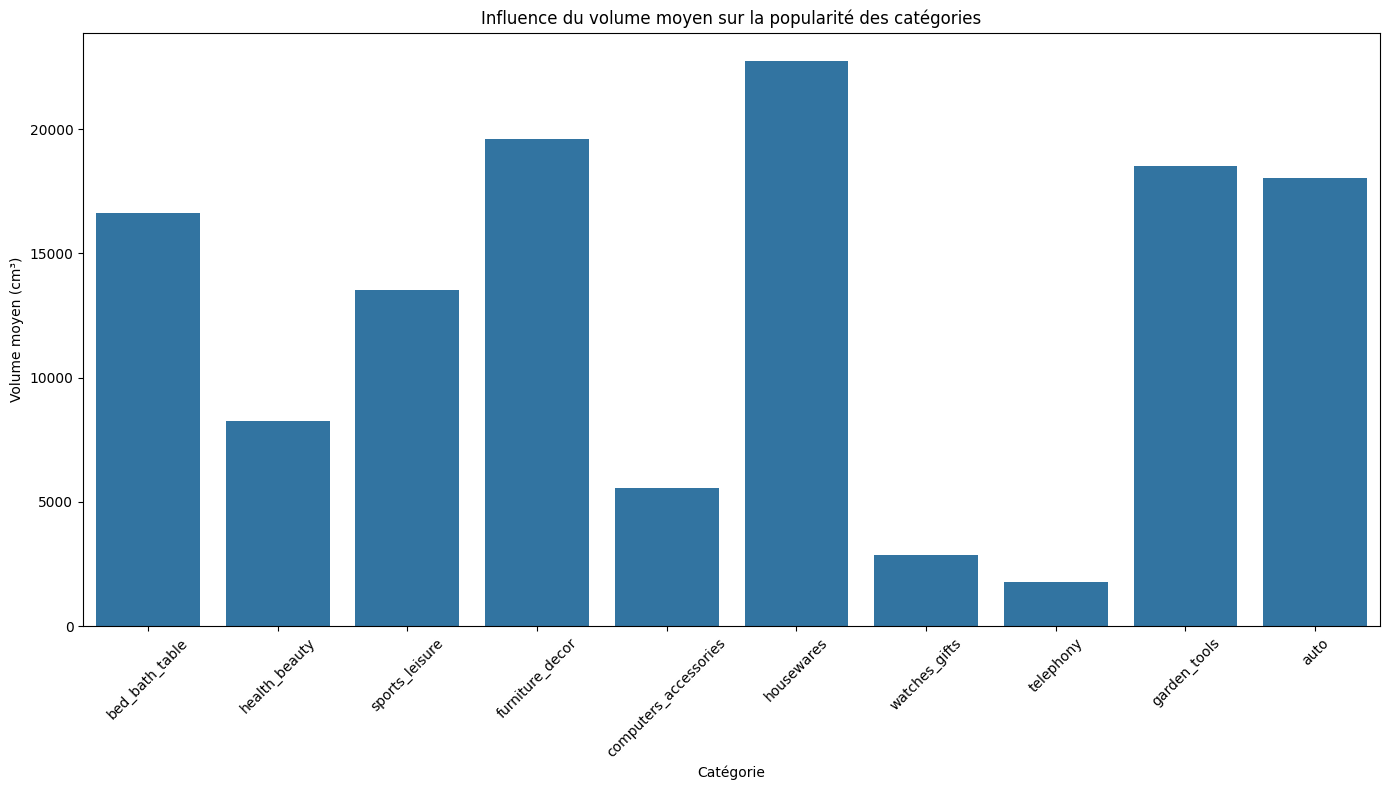

In [12]:
plt.figure(figsize=(14, 8))
category_product_details['volume_cm3'] = category_product_details['length_cm'] * category_product_details['height_cm'] * category_product_details['width_cm']
avg_volume_category = category_product_details.groupby('category_name')['volume_cm3'].mean().loc[top_categories]
sns.barplot(x=avg_volume_category.index, y=avg_volume_category.values)
plt.xlabel('Catégorie')
plt.ylabel('Volume moyen (cm³)')
plt.title('Influence du volume moyen sur la popularité des catégories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Influence du nombre moyen de photos sur la popularité des catégories

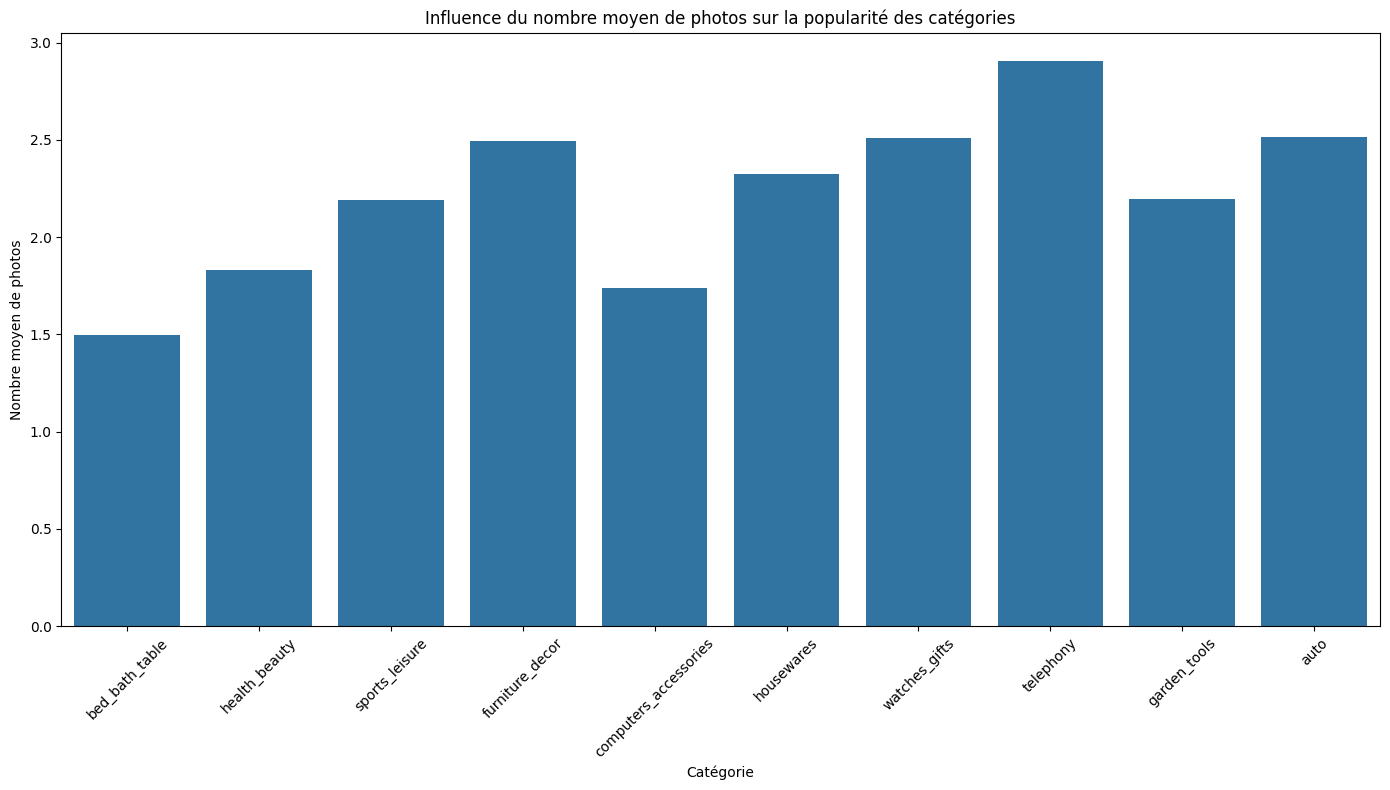

In [13]:
plt.figure(figsize=(14, 8))
avg_photos_qty_category = category_product_details.groupby('category_name')['photos_qty'].mean().loc[top_categories]
sns.barplot(x=avg_photos_qty_category.index, y=avg_photos_qty_category.values)
plt.xlabel('Catégorie')
plt.ylabel('Nombre moyen de photos')
plt.title('Influence du nombre moyen de photos sur la popularité des catégories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Influence de la longueur de description moyenne sur la popularité des catégories

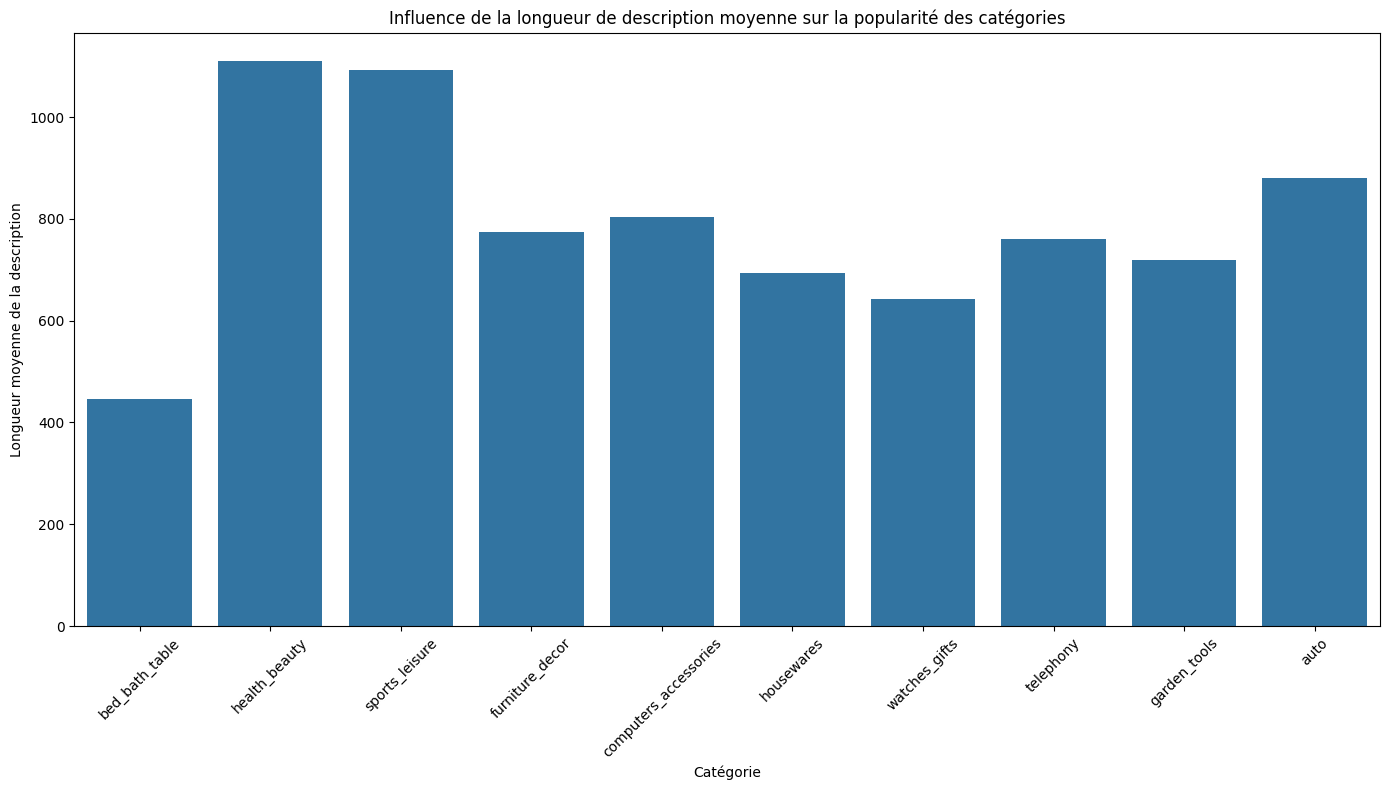

In [14]:
plt.figure(figsize=(14, 8))
avg_description_length_category = category_product_details.groupby('category_name')['description_lenght'].mean().loc[top_categories]
sns.barplot(x=avg_description_length_category.index, y=avg_description_length_category.values)
plt.xlabel('Catégorie')
plt.ylabel('Longueur moyenne de la description')
plt.title('Influence de la longueur de description moyenne sur la popularité des catégories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relation entre le prix et le nombre de ventes par produit pour chaque catégorie

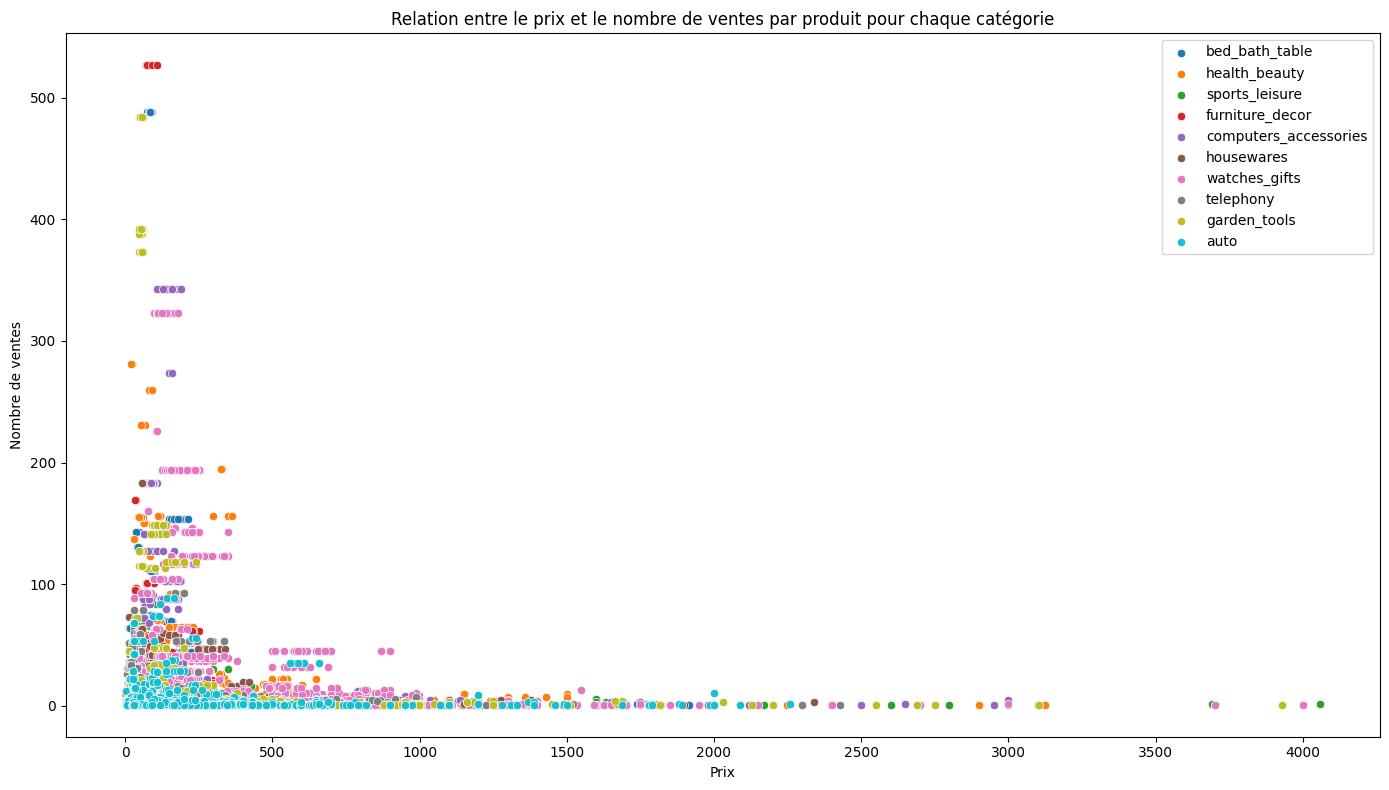

In [15]:
plt.figure(figsize=(14, 8))
for category in top_categories:
    category_data = product_sales[product_sales['category_name'] == category].merge(category_product_details[['product_id', 'price']], on='product_id').drop_duplicates()
    category_data = category_data[category_data['price'] <= 4200]
    sns.scatterplot(x='price', y='counts', data=category_data, label=category)
plt.xlabel('Prix')
plt.ylabel('Nombre de ventes')
plt.title('Relation entre le prix et le nombre de ventes par produit pour chaque catégorie')
plt.legend()
plt.tight_layout()
plt.show()